In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import astropy.units as u # I use astropy units in everything, very helpful for bookkeeping/debugging

from lim import lim # The base intensity mapping object

matplotlib.rcParams.update({'font.size': 18,'figure.figsize':[8,7]}) # Make figures better
#matplotlib.rcParams,update({}'figure.figsize'] = [8,7]
from scipy.ndimage import gaussian_filter

Loading both models:

In [2]:
# Initialize LineModel with default model
m = lim()
m_cii_mhi = lim('Lichen', doSim = True)
m_cii_mhiz = lim('Lichen_v2', doSim = True)

Input cosmological model does not match simulations
Setting analytic cosmology to match simulation
Input cosmological model does not match simulations
Setting analytic cosmology to match simulation


In [3]:
mhi_map = m_cii_mhi.maps

Loading .npz catalogues...


In [4]:
mhiz_map = m_cii_mhiz.maps

Loading .npz catalogues...


Histograms:

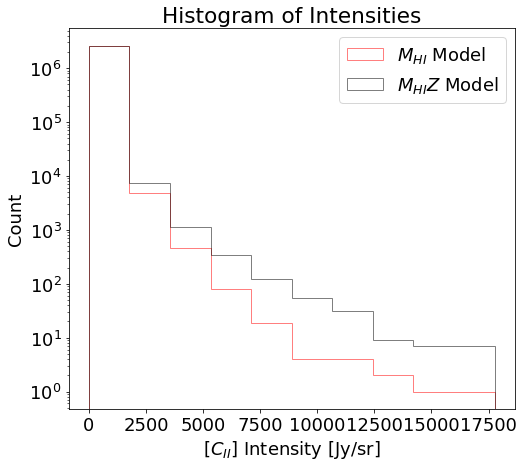

In [19]:
n_mhi, bins, _ = plt.hist(mhi_map.value.flatten(), edgecolor = 'r', label = r'$M_{HI}$ Model', alpha = 0.5, histtype = 'step')
n_mhiz, _, _ = plt.hist(mhiz_map.value.flatten(), bins = bins, edgecolor = 'black', label = r'$M_{HI}Z$ Model', alpha = 0.5, histtype = 'step')
plt.legend()

center = (bins[:-1] + bins[1:]) / 2


plt.xlabel(r'$[C_{II}]$ Intensity [Jy/sr]')
plt.ylabel('Count')
plt.yscale('log')
plt.title('Histogram of Intensities')
plt.savefig('may/histograms/mhi_mhiz.png')

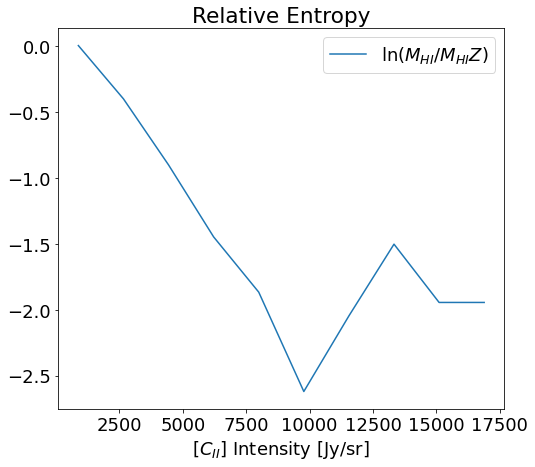

In [20]:
plt.plot(center, np.log(n_mhi/n_mhiz), label = r'ln($M_{HI}$/$M_{HI}Z$)')
plt.title(r'Relative Entropy')
plt.xlabel(r'$[C_{II}]$ Intensity [Jy/sr]')
plt.legend(bbox_to_anchor = (1,1))
plt.savefig('may/mhi_mhiz_entropy.png')